In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# 평균 제곱 오차
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [55]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [56]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# log(0)은 inf기 때문에 임의의 작은 값 delta를 더함

In [57]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [58]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [59]:
train_size = x_train.shape[0]
print("train_size: ", train_size)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(len(x_batch))
print(len(t_batch))

train_size:  60000
[23110 28521  8085  7548 39024 15274 32487  4176 47202 15359]
10
10


In [60]:
#배치용 교차 엔트로피 구현
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+ 1e-7)) / batch_size

In [61]:
# 원 핫 인코딩이 아닌 숫자 레이블로 주어졌을 때 엔트로피 오차
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수지해석

In [62]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [63]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

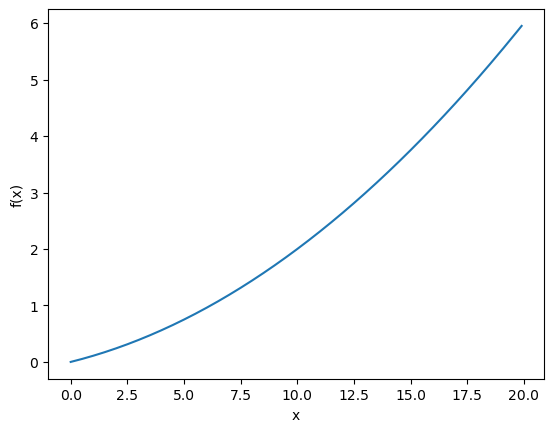

In [64]:

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [65]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [66]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [67]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [68]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [69]:
#학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=10.0, step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [70]:
# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기

In [71]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [72]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    

In [73]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[[-0.15227052  0.20091773 -0.72043946]
 [ 0.5920827   1.64711535  1.61901212]]
[0.44151212 1.60295445 1.02484723]


In [74]:
np.argmax(p)

1

In [75]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.206178595597631

In [76]:
def f(W):
    return net.loss(x, t)

In [77]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10022476  0.32017176 -0.42039652]
 [ 0.15033714  0.48025764 -0.63059479]]


In [78]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10022476  0.32017176 -0.42039652]
 [ 0.15033714  0.48025764 -0.63059479]]


### 학습 알고리즘 구현하기
<br>
1단계 - 미니배치<br>
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.<br>
2단계 - 기울기 산출<br>
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다.<br>
3단계 - 배개변수 갱신<br>
    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.<br>
4단계 - 반복<br>
    1~3단계를 반복한다<br>

In [79]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params["W1"])
        grads['b1'] = numerical_gradient(loss_W, self.params["b1"])
        grads['W2'] = numerical_gradient(loss_W, self.params["W2"])
        grads['b2'] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads
    

In [80]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [81]:
x = np.random.rand(100, 784)
print(x.shape)
y = net.predict(x)
print(y)

(100, 784)
[[0.10974682 0.09439177 0.10177043 0.10390326 0.09840412 0.09645367
  0.10271975 0.09956832 0.094254   0.09878786]
 [0.10964726 0.09439468 0.10187711 0.10410224 0.09809079 0.09624538
  0.10309977 0.09946119 0.09421052 0.09887105]
 [0.10967416 0.09426623 0.10173003 0.10388469 0.09819968 0.09645691
  0.10285107 0.09956612 0.09449645 0.09887465]
 [0.10970701 0.09389491 0.10205573 0.10380107 0.0983899  0.09600368
  0.10303575 0.09935911 0.09456159 0.09919126]
 [0.10957784 0.09407114 0.102051   0.1037048  0.09855015 0.09630384
  0.10283091 0.09991095 0.0941159  0.09888348]
 [0.10950338 0.09437998 0.10200847 0.10367001 0.09850385 0.09661346
  0.10283692 0.09946442 0.09411758 0.09890193]
 [0.10994597 0.09424309 0.10191198 0.10406129 0.0981863  0.09631613
  0.10243091 0.09985732 0.09410177 0.09894525]
 [0.10978541 0.09373898 0.10224302 0.103929   0.09821973 0.09616488
  0.10299845 0.09984115 0.09444122 0.09863816]
 [0.10985199 0.09402743 0.10181759 0.10418553 0.09824191 0.09615694
 

In [82]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

KeyboardInterrupt: 

In [84]:
# 미니배치 학습 구현
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train) , (x_test, t_test) = load_mnist(normalize=True, one_hot_label= True)

train_loss_list = []

iters_num = 25
train_size = x_train.shape[0]
batch_size = 10
lr = 0.1

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

KeyboardInterrupt: 